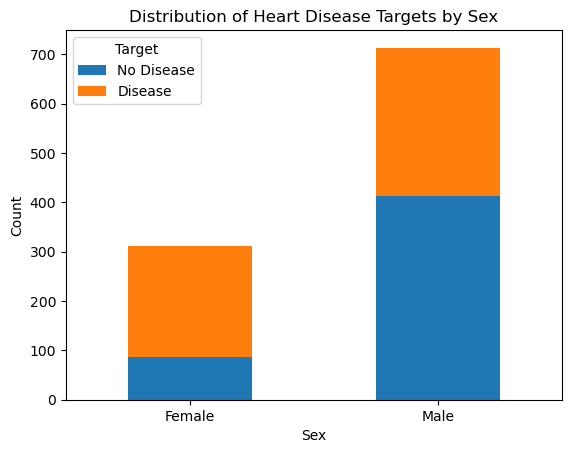

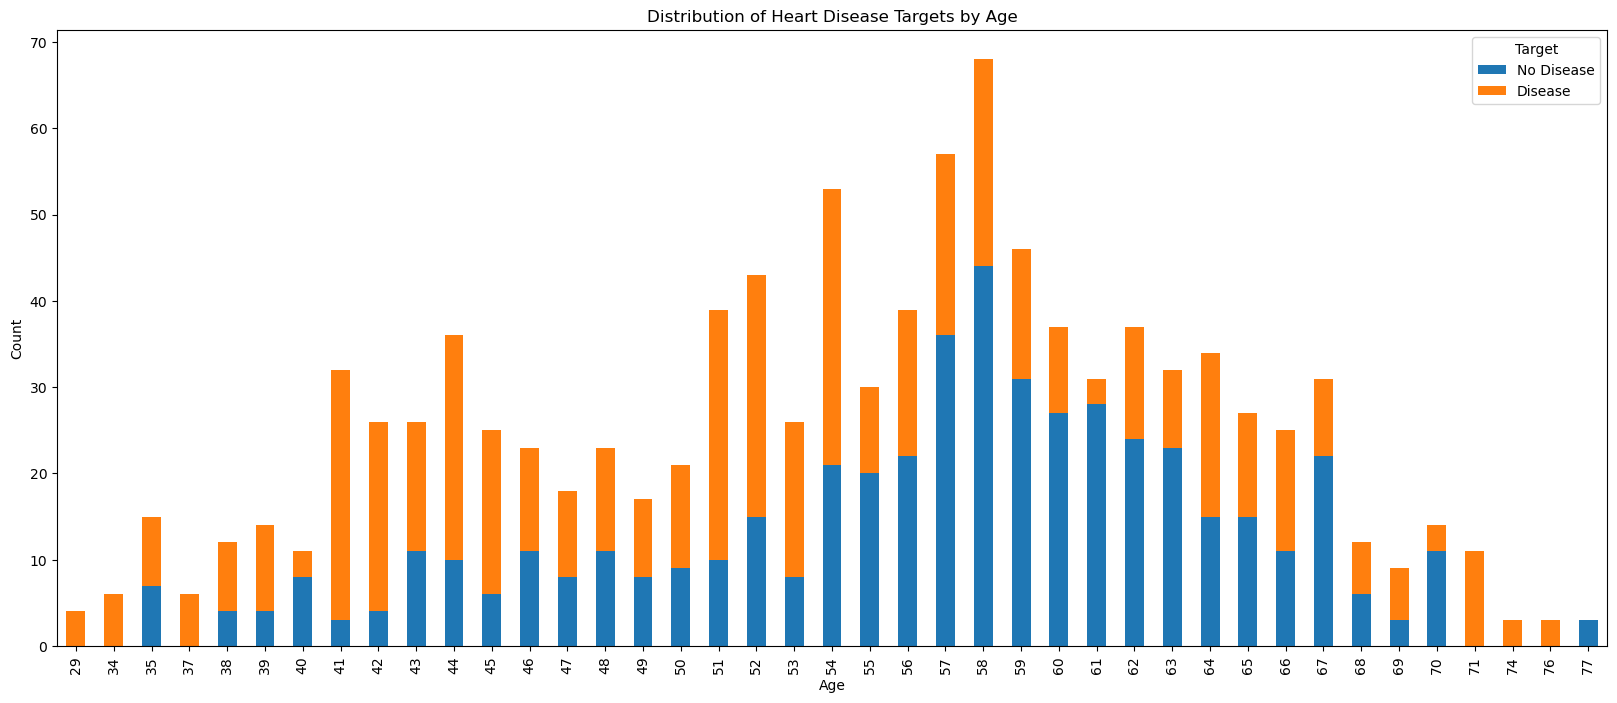

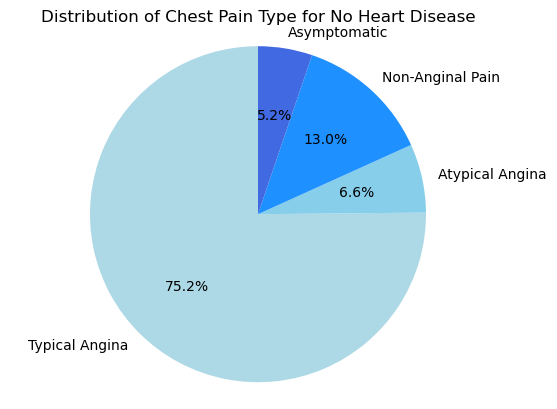

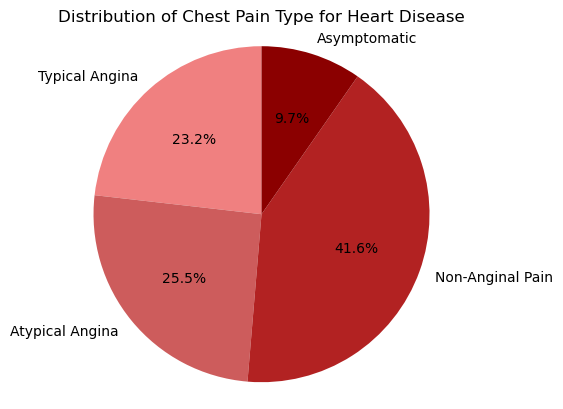

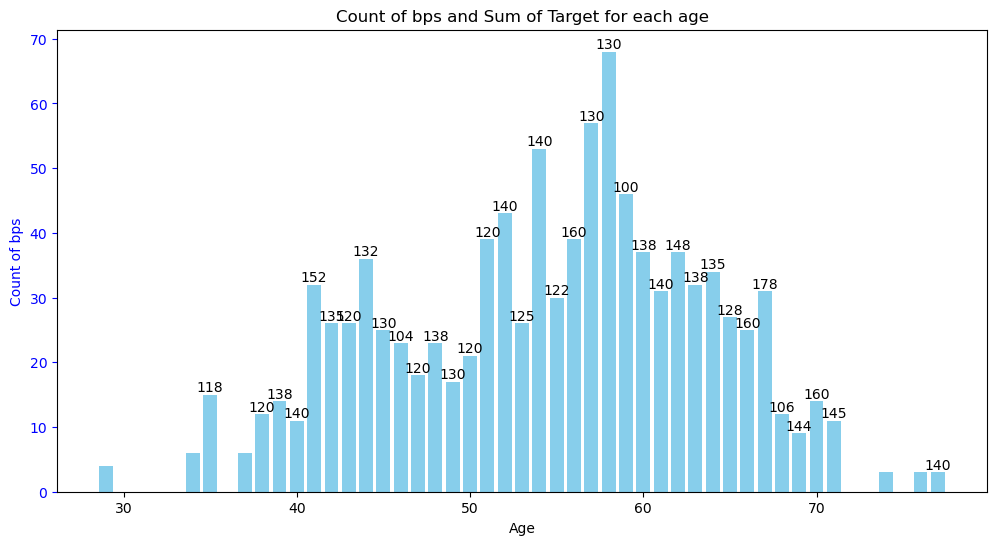

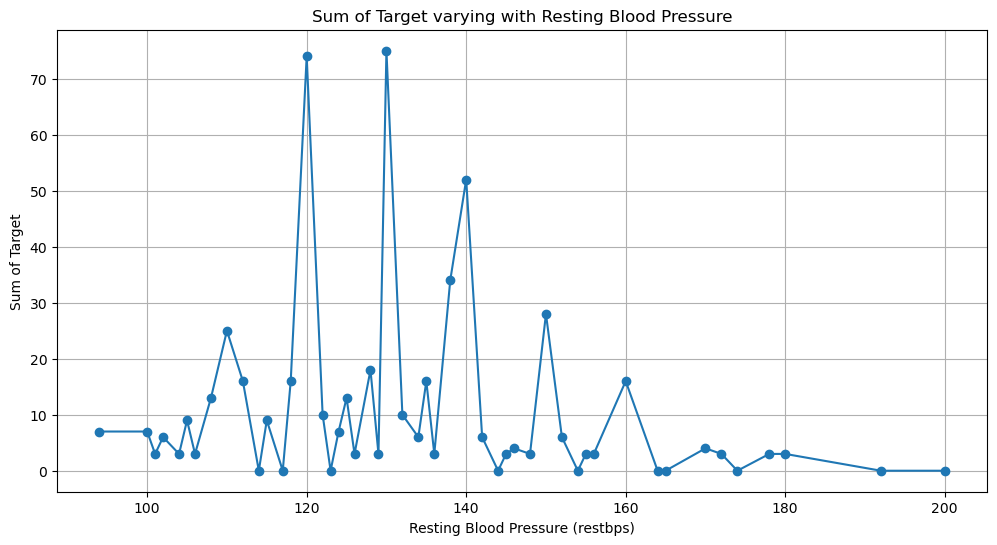

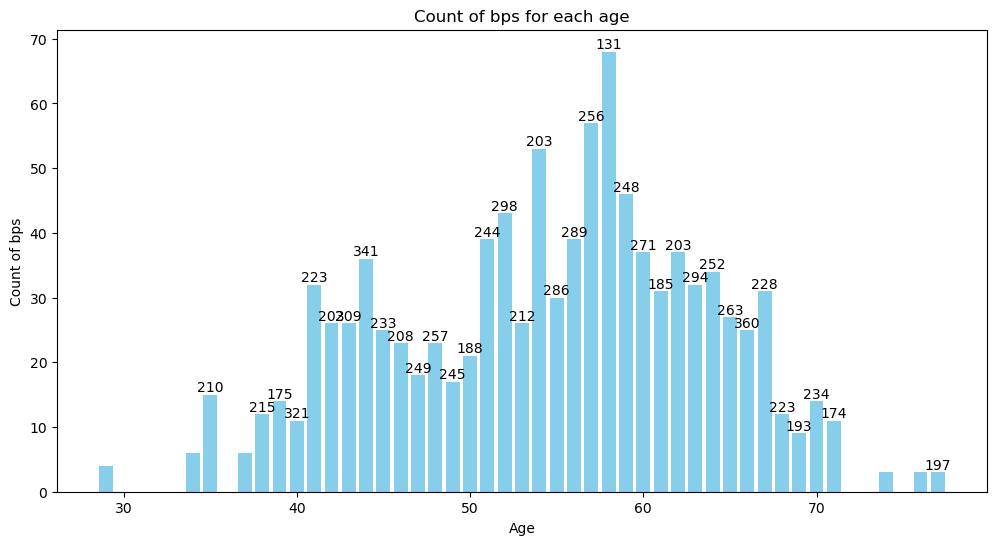

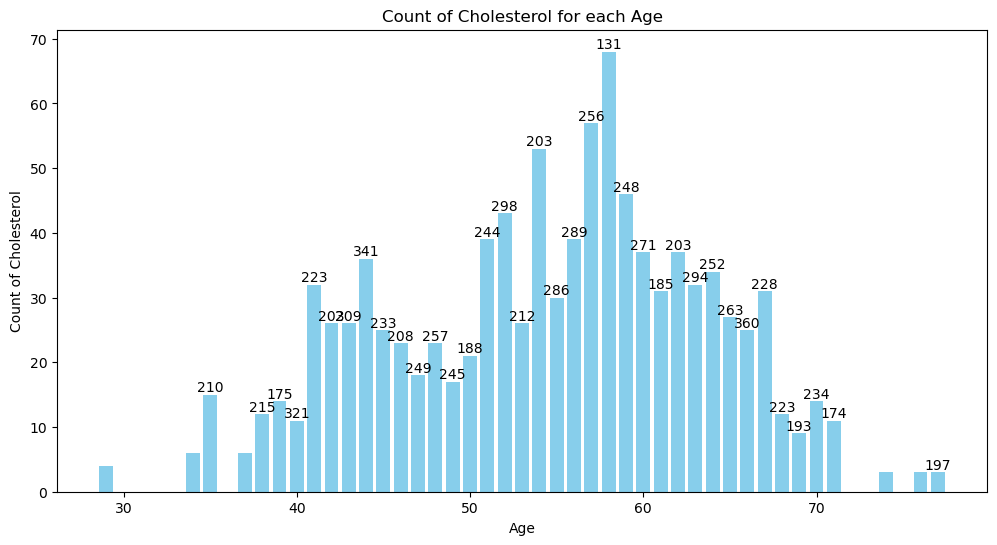

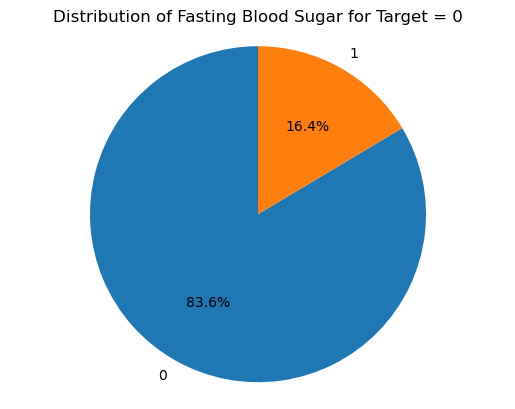

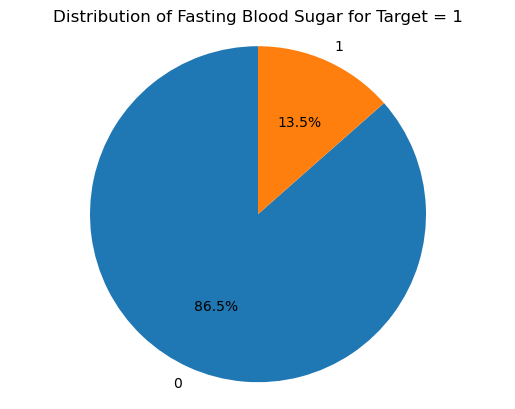

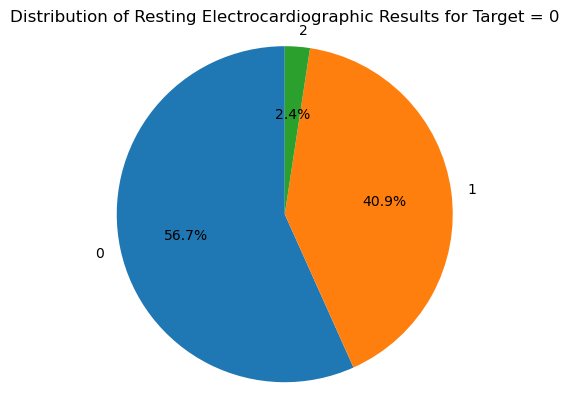

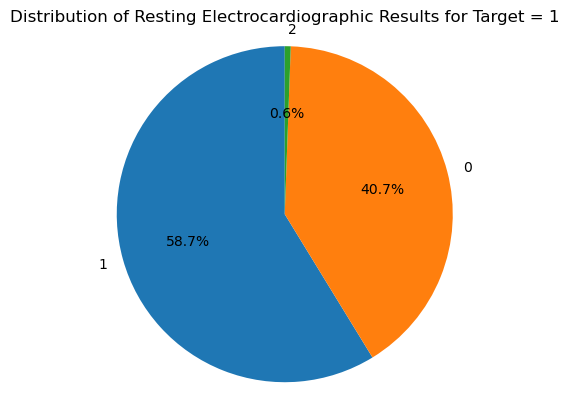

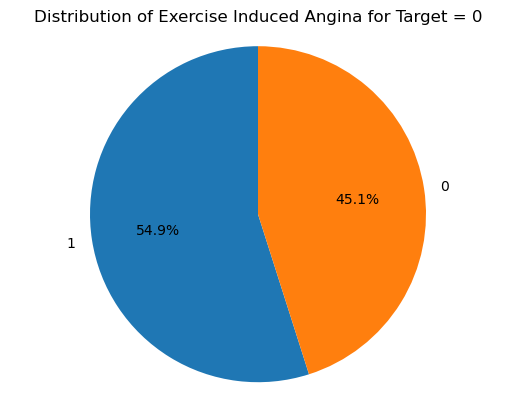

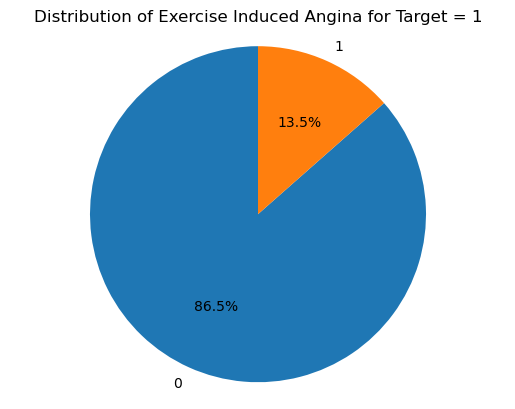

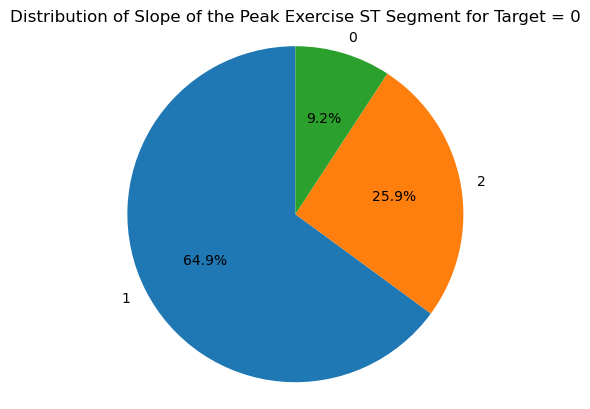

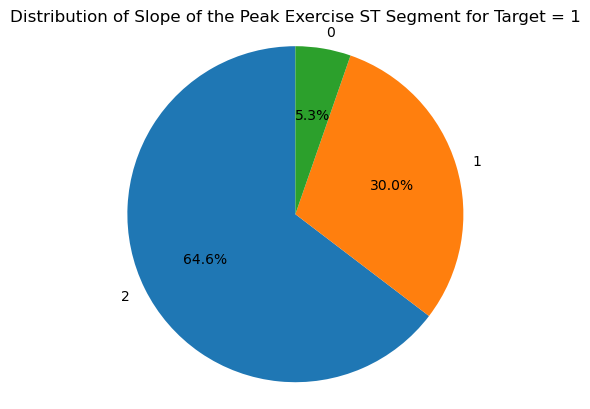

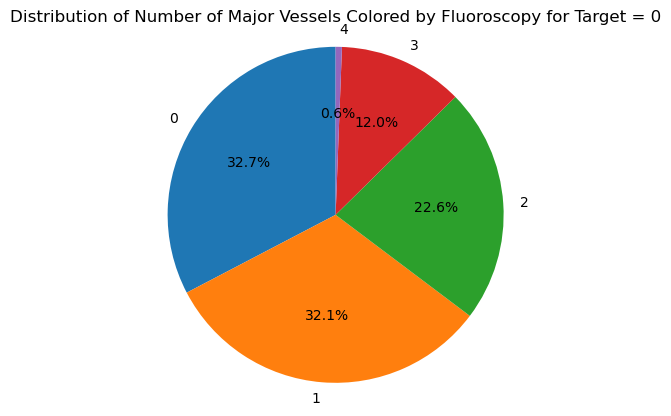

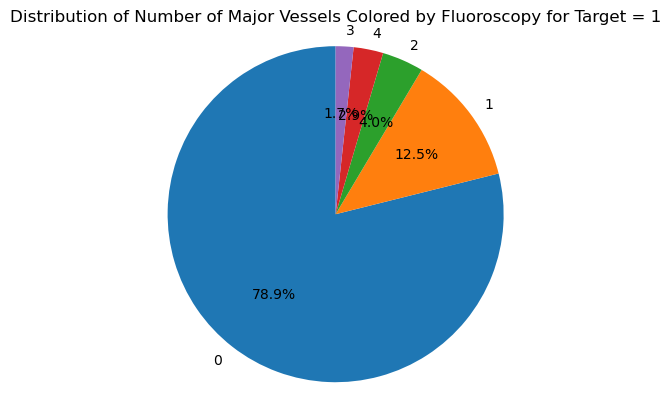

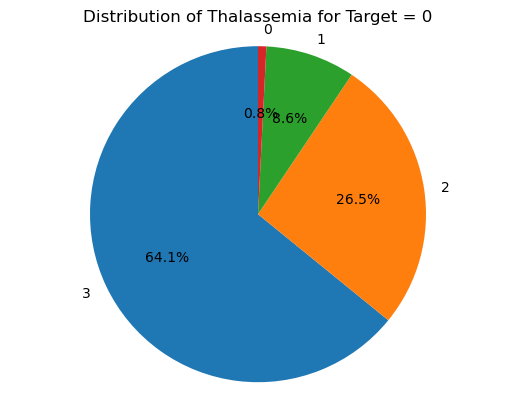

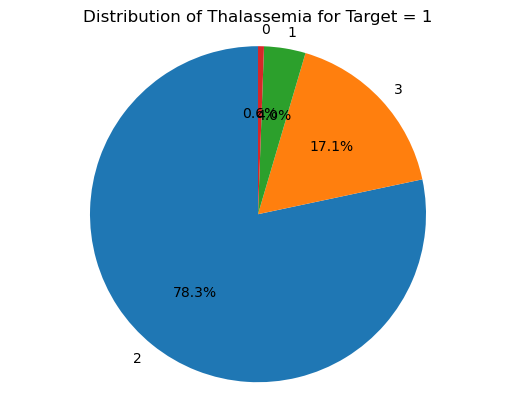

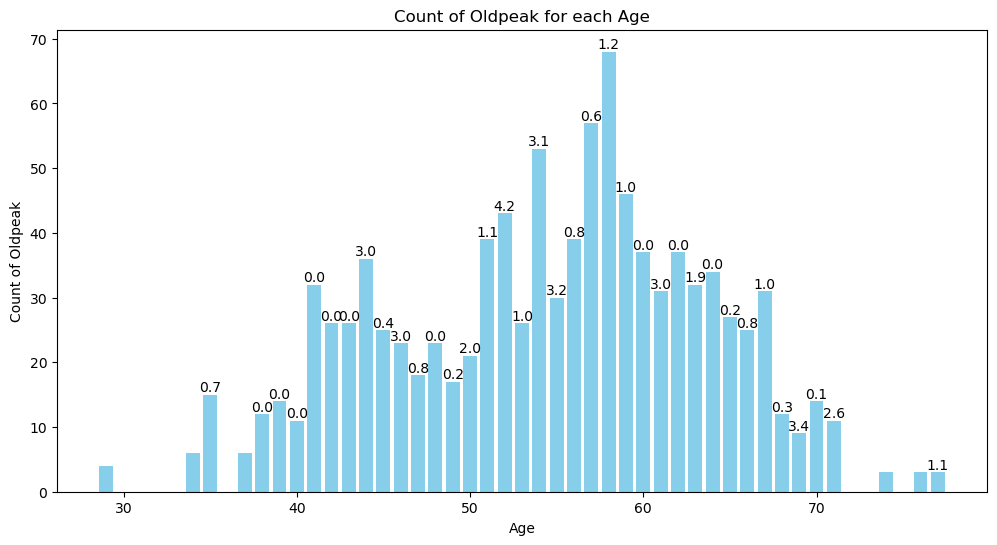

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('DataSet/2_HeartDiseaseData.csv')

# Task 1: Bar graph for 'sex' vs 'target'
sex_target_counts = data.groupby(['sex', 'target']).size().unstack(fill_value=0)
sex_target_counts.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Targets by Sex')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

# Task 2: Bar graph for 'age' vs 'target'
age_target_counts = data.groupby(['age', 'target']).size().unstack(fill_value=0)
age_target_counts.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Targets by Age')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

cp_target_counts_0 = data[data['target'] == 0]['cp'].value_counts()
cp_target_counts_1 = data[data['target'] == 1]['cp'].value_counts()

#Task3.1: Create the pie chart for 'No Heart Disease'
fig, ax = plt.subplots()

sub_labels_0 = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
sub_counts_0 = [cp_target_counts_0.get(0, 0), cp_target_counts_0.get(1, 0), cp_target_counts_0.get(2, 0), cp_target_counts_0.get(3, 0)]
sub_colors_0 = ['lightblue', 'skyblue', 'dodgerblue', 'royalblue']
ax.pie(sub_counts_0, labels=sub_labels_0, colors=sub_colors_0, startangle=90, autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.title('Distribution of Chest Pain Type for No Heart Disease')

plt.show()

#Task3.2: Create the pie chart for 'Heart Disease'
fig, ax = plt.subplots()

sub_labels_1 = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
sub_counts_1 = [cp_target_counts_1.get(0, 0), cp_target_counts_1.get(1, 0), cp_target_counts_1.get(2, 0), cp_target_counts_1.get(3, 0)]
sub_colors_1 = ['lightcoral', 'indianred', 'firebrick', 'darkred']
ax.pie(sub_counts_1, labels=sub_labels_1, colors=sub_colors_1, startangle=90, autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.title('Distribution of Chest Pain Type for Heart Disease')

plt.show()

age_bps_count = data.groupby('age')['restbps'].count()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(age_bps_count.index, age_bps_count.values, color='skyblue')

# Adding labels and title for the bar chart
ax1.set_xlabel('Age')
ax1.set_ylabel('Count of bps', color='b')
ax1.set_title('Count of bps and Sum of Target for each age')
ax1.tick_params('y', colors='b')

# Adding the actual 'bps' values on top of each bar
for bar in bars:
    yval = bar.get_height()
    age = int(bar.get_x())
    bps_values = data[data['age'] == age]['restbps']
    if not bps_values.empty:
        bps_value = bps_values.iloc[0]
        ax1.text(bar.get_x() + bar.get_width()/2.0, yval, str(bps_value), va='bottom', ha='center')

# Grouping by 'age' and 'restbps' and calculating the sum of 'target' for each group
target_sum = data.groupby('restbps')['target'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the line chart for 'target' varying with 'restbps'
plt.plot(target_sum['restbps'], target_sum['target'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Resting Blood Pressure (restbps)')
plt.ylabel('Sum of Target')
plt.title('Sum of Target varying with Resting Blood Pressure')

plt.grid(True)
plt.show()

age_chol_count = data.groupby('age')['chol'].count()

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(age_chol_count.index, age_chol_count.values, color='skyblue')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count of bps')
plt.title('Count of bps for each age')

# Adding the actual 'bps' values on top of each bar
for bar in bars:
    yval = bar.get_height()
    age = int(bar.get_x())
    chol_values = data[data['age'] == age]['chol']
    if not chol_values.empty:
        chol_value = chol_values.iloc[0]
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(chol_value), va='bottom', ha='center')

plt.show()


def create_bar_graph(data, x_column, y_column, x_label, y_label, title):
    grouped_data = data.groupby(x_column)[y_column].count()
    plt.figure(figsize=(12, 6))
    bars = plt.bar(grouped_data.index, grouped_data.values, color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    for bar in bars:
        yval = bar.get_height()
        age = int(bar.get_x())
        column_values = data[data[x_column] == age][y_column]
        if not column_values.empty:
            column_value = column_values.iloc[0]
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(column_value), va='bottom', ha='center')
    plt.show()

# Task 1: Bar graph for showing relationship between "age" and "chol"
create_bar_graph(data, 'age', 'chol', 'Age', 'Count of Cholesterol', 'Count of Cholesterol for each Age')

# Function to create pie charts for showing relationship between a column and target for different target values
def create_pie_charts(data, column, title_prefix):
    target_values = data['target'].unique()
    for target_value in target_values:
        fig, ax = plt.subplots()
        target_data = data[data['target'] == target_value][column].value_counts()
        labels = target_data.index
        sizes = target_data.values
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.axis('equal') 
        plt.title(f'{title_prefix} for Target = {target_value}')
        plt.show()

# Task 2: Show relationship between "fbs" and "target"
create_pie_charts(data, 'fbs', 'Distribution of Fasting Blood Sugar')

# Task 3: Show relationship between "restecg" and "target"
create_pie_charts(data, 'restecg', 'Distribution of Resting Electrocardiographic Results')

# Task 4: Show relationship between "exang" and "target"
create_pie_charts(data, 'exang', 'Distribution of Exercise Induced Angina')

# Task 5: Show relationship between "slope" and "target"
create_pie_charts(data, 'slope', 'Distribution of Slope of the Peak Exercise ST Segment')

# Task 6: Show relationship between "ca" and "target"
create_pie_charts(data, 'ca', 'Distribution of Number of Major Vessels Colored by Fluoroscopy')

# Task 7: Show relationship between "thal" and "target"
create_pie_charts(data, 'thal', 'Distribution of Thalassemia')

# Function to create a bar graph for showing relationship between "age" and "oldpeak"
def create_bar_graph_oldpeak(data):
    grouped_data = data.groupby('age')['oldpeak'].count()
    plt.figure(figsize=(12, 6))
    bars = plt.bar(grouped_data.index, grouped_data.values, color='skyblue')
    plt.xlabel('Age')
    plt.ylabel('Count of Oldpeak')
    plt.title('Count of Oldpeak for each Age')
    for bar in bars:
        yval = bar.get_height()
        age = int(bar.get_x())
        oldpeak_values = data[data['age'] == age]['oldpeak']
        if not oldpeak_values.empty:
            oldpeak_value = oldpeak_values.iloc[0]
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(oldpeak_value), va='bottom', ha='center')
    plt.show()

# Task 8: Bar graph for showing relationship between "age" and "oldpeak"
create_bar_graph_oldpeak(data)

# Function to create a bar graph for showing relationship between "age" and "thalach"
def create_bar_graph_thalach(data):
    grouped_data = data.groupby('age')['thalach'].count()
    plt.figure(figsize=(12, 6))
    bars = plt.bar(grouped_data.index, grouped_data.values, color='skyblue')
    plt.xlabel('Age')
    plt.ylabel('Count of Thalach')
    plt.title('Count of Thalach for each Age')
    for bar in bars:
        yval = bar.get_height()
        age = int(bar.get_x())
        thalach_values = data[data['age'] == age]['thalach']
        if not thalach_values.empty:
            thalach_value
